In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Chemin vers le dossier dataset dans Google Drive
data_dir = '/content/drive/MyDrive/try/car/data1a'

# Afficher la liste des fichiers dans le dossier dataset
files = os.listdir(data_dir)
print(files)

['validation', 'testing', 'training']


In [3]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Chemins vers vos dossiers
train_path = '/content/drive/MyDrive/try/car/data1a/training'
validation_path = '/content/drive/MyDrive/try/car/data1a/validation'
test_path = '/content/drive/MyDrive/try/car/data1a/testing'

In [4]:
# Sous-répertoires pour chaque catégorie
categories = ['01-whole', '00-damage']

In [6]:
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_data_info(directory):
    data_info = []
    for category in categories:
        category_path = os.path.join(directory, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = load_img(img_path)
            img_array = img_to_array(img)
            data_info.append({
                'path': img_path,
                'category': category,
                'width': img_array.shape[1],
                'height': img_array.shape[0],
                'channels': img_array.shape[2]
            })
    return pd.DataFrame(data_info)

# Charger les informations pour chaque ensemble de données
train_data_info = load_data_info(train_path)
val_data_info = load_data_info(validation_path)
test_data_info = load_data_info(test_path)

In [7]:
# Afficher les premières lignes des DataFrames
print(train_data_info.head())
print(val_data_info.head())
print(test_data_info.head())

                                                path  category  width  height  \
0  /content/drive/MyDrive/try/car/data1a/training...  01-whole    300     225   
1  /content/drive/MyDrive/try/car/data1a/training...  01-whole    152     114   
2  /content/drive/MyDrive/try/car/data1a/training...  01-whole    640     480   
3  /content/drive/MyDrive/try/car/data1a/training...  01-whole    490     325   
4  /content/drive/MyDrive/try/car/data1a/training...  01-whole    850     351   

   channels  
0         3  
1         3  
2         3  
3         3  
4         3  
                                                path  category  width  height  \
0  /content/drive/MyDrive/try/car/data1a/validati...  01-whole    544     362   
1  /content/drive/MyDrive/try/car/data1a/validati...  01-whole    640     480   
2  /content/drive/MyDrive/try/car/data1a/validati...  01-whole    413     294   
3  /content/drive/MyDrive/try/car/data1a/validati...  01-whole    300     199   
4  /content/drive/MyDriv

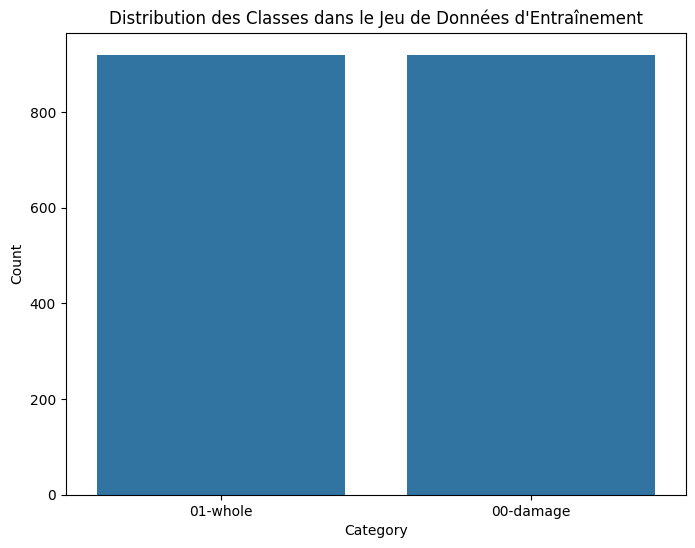

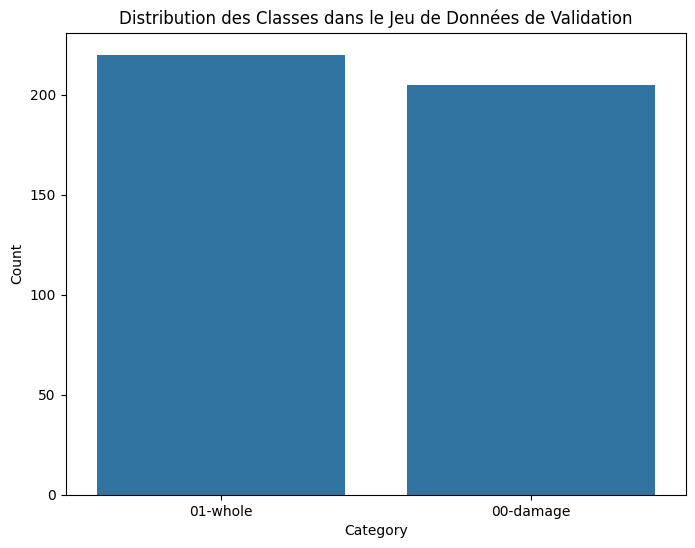

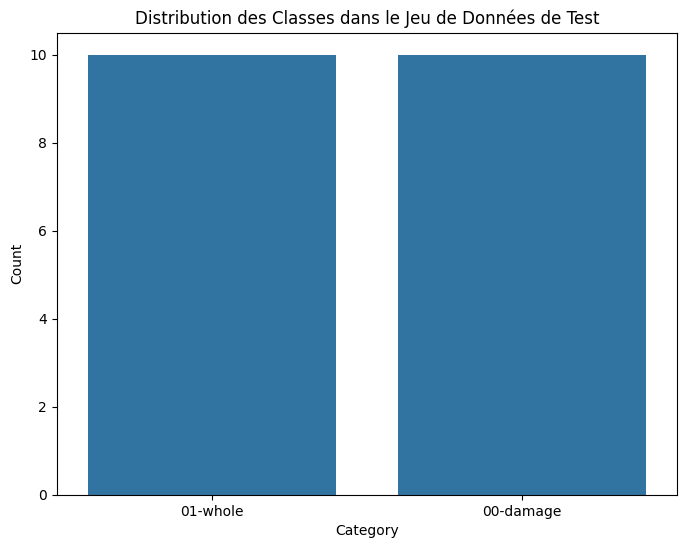

In [8]:
# Fonction pour afficher la distribution des classes
def plot_class_distribution(data_info, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_info, x='category')
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

# Distribution des classes dans les ensembles de données
plot_class_distribution(train_data_info, 'Distribution des Classes dans le Jeu de Données d\'Entraînement')
plot_class_distribution(val_data_info, 'Distribution des Classes dans le Jeu de Données de Validation')
plot_class_distribution(test_data_info, 'Distribution des Classes dans le Jeu de Données de Test')

In [9]:
# Fonction pour afficher les statistiques descriptives
def display_statistics(data_info, dataset_name):
    print(f"Statistiques descriptives pour {dataset_name}")
    print(data_info.describe())

# Statistiques descriptives pour chaque ensemble de données
display_statistics(train_data_info, 'Jeu de Données d\'Entraînement')
display_statistics(val_data_info, 'Jeu de Données de Validation')
display_statistics(test_data_info, 'Jeu de Données de Test')

Statistiques descriptives pour Jeu de Données d'Entraînement
             width       height  channels
count  1840.000000  1840.000000    1840.0
mean    447.538043   312.046739       3.0
std     361.568471   246.874234       0.0
min     112.000000    80.000000       3.0
25%     259.000000   185.000000       3.0
50%     276.000000   194.000000       3.0
75%     580.000000   367.000000       3.0
max    4912.000000  3264.000000       3.0
Statistiques descriptives pour Jeu de Données de Validation
             width       height  channels
count   425.000000   425.000000     425.0
mean    467.402353   327.202353       3.0
std     361.139073   252.930245       0.0
min     112.000000    74.000000       3.0
25%     259.000000   188.000000       3.0
50%     284.000000   194.000000       3.0
75%     626.000000   420.000000       3.0
max    2610.000000  1944.000000       3.0
Statistiques descriptives pour Jeu de Données de Test
            width      height  channels
count   20.000000   20.000000

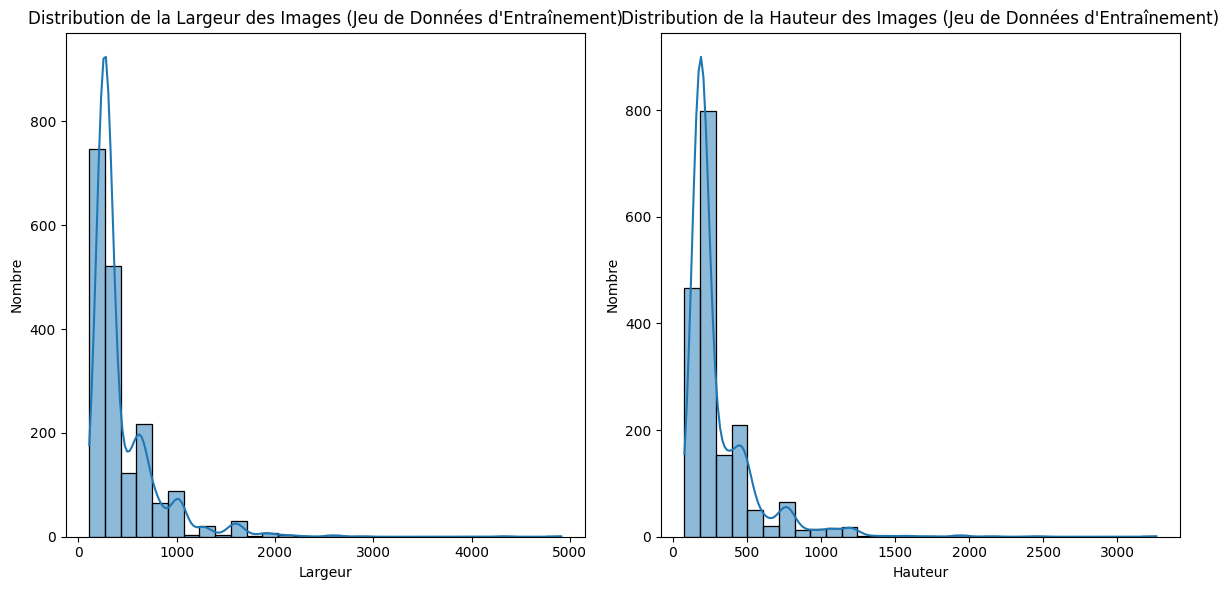

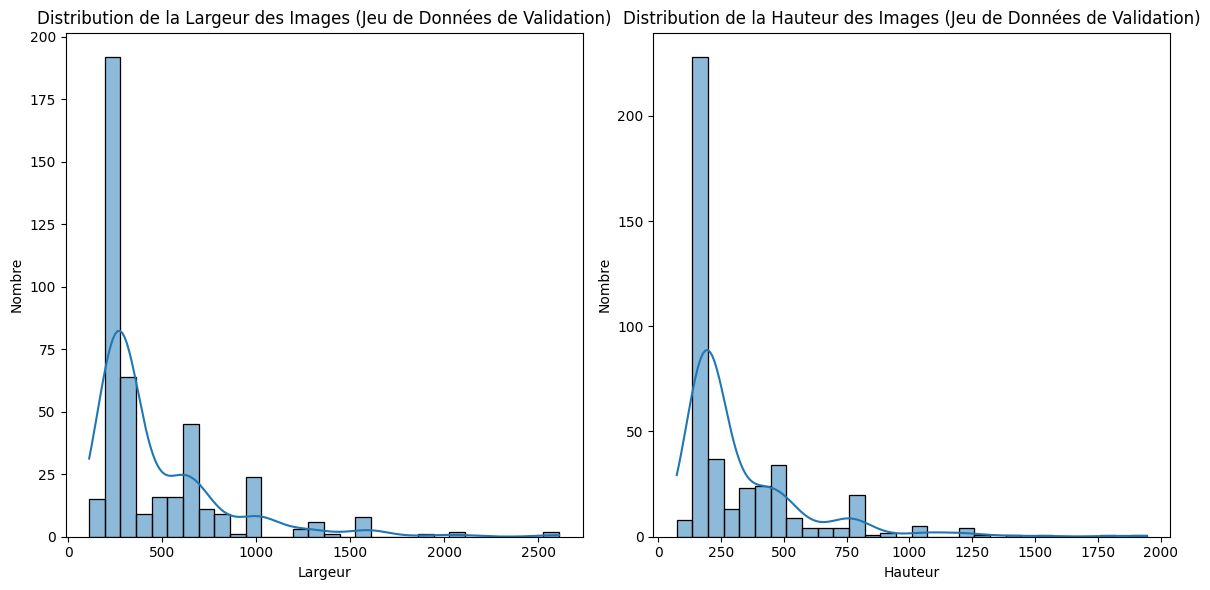

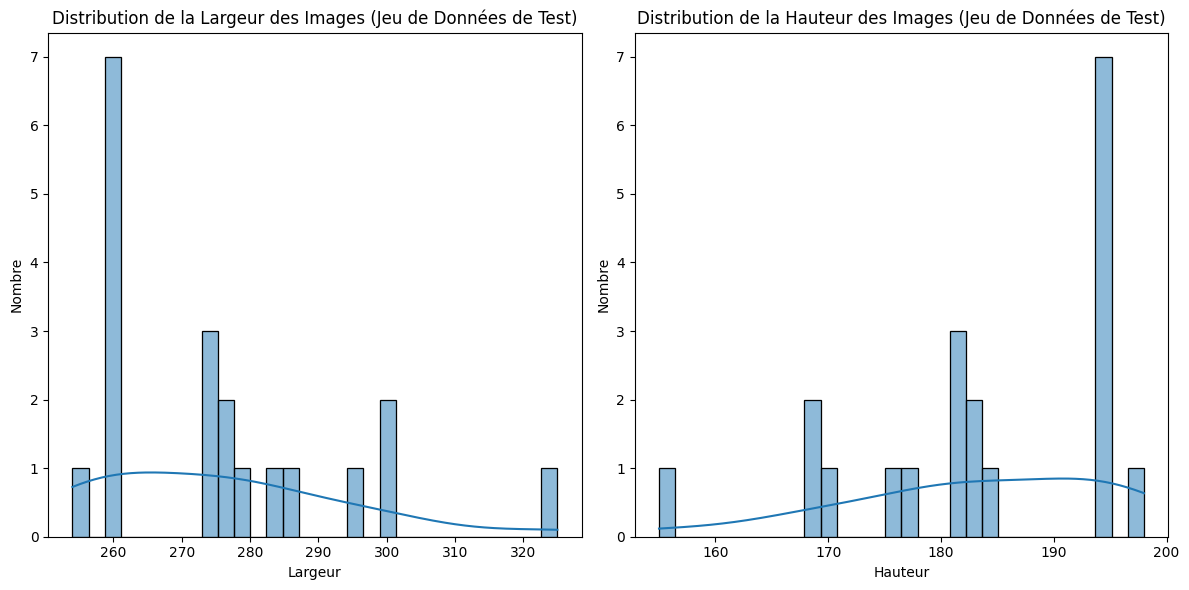

In [11]:
# Fonction pour afficher la distribution des dimensions des images
def plot_image_dimensions(data_info, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data_info['width'], kde=True, bins=30)
    plt.title(f'Distribution de la Largeur des Images ({title})')
    plt.xlabel('Largeur')
    plt.ylabel('Nombre')

    plt.subplot(1, 2, 2)
    sns.histplot(data_info['height'], kde=True, bins=30)
    plt.title(f'Distribution de la Hauteur des Images ({title})')
    plt.xlabel('Hauteur')
    plt.ylabel('Nombre')

    plt.tight_layout()
    plt.show()

# Distribution des dimensions des images pour chaque ensemble de données
plot_image_dimensions(train_data_info, 'Jeu de Données d\'Entraînement')
plot_image_dimensions(val_data_info, 'Jeu de Données de Validation')
plot_image_dimensions(test_data_info, 'Jeu de Données de Test')